## Topic: 06 - Linear Regression and Learning Curve challenges
## Date: 10/15/2018
## Name: Amine Naouas

In [168]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
sns.set()
%matplotlib inline

** Challenge 1**

Generate X

In [169]:
np.random.seed(0)
sigma=1
X=np.exp(np.random.normal(0, sigma, 1000))

Generate the outcome

In [170]:
np.random.seed(42)
sigma=0.1
u = np.random.normal(0, sigma, 1000)
beta0=-1
beta1=0.5
y=beta0+beta1*np.log(X)+u

Create a dataframe with the features we will need for the two models.

In [171]:
df=pd.DataFrame(index=range(1000))

In [172]:
df['X']=X

In [173]:
df['X_squared']=X**2

In [174]:
df['X_log']=np.log(X)

In [175]:
df.columns

Index(['X', 'X_squared', 'X_log'], dtype='object')

Split data into training and test sets

In [176]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.25, random_state=42)

1) First model : quatratic 

In [177]:
features=['X','X_squared']

In [178]:
lm = LinearRegression()
lm.fit(X_train[features], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [179]:
lm.intercept_

-1.5724834860044978

In [180]:
list(zip(features,lm.coef_))

[('X', 0.456464027471109), ('X_squared', -0.0266652533097675)]

In [181]:
# Train score
print('Training R^2: %.3f' % lm.score(X_train[features], y_train))

Training R^2: 0.809


In [183]:
# Test score
print('Test R^2: %.3f' % lm.score(X_test[features], y_test))

Test R^2: 0.817


The R2 is 82 % on the test data --> not bad, but this can be improved.

2) Second model : log

In [184]:
features=['X_log']

In [185]:
lm = LinearRegression()
lm.fit(X_train[features].values.reshape(-1,1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [186]:
lm.intercept_

-0.9957382063051154

In [187]:
list(zip(features,lm.coef_))

[('X_log', 0.5005618590964958)]

In [188]:
# Train score
print('Training R^2: %.3f' % lm.score(X_train[features], y_train))

Training R^2: 0.962


In [189]:
# Test score
print('Test R^2: %.3f' % lm.score(X_test[features], y_test))

Test R^2: 0.965


The coefficients estoimation is very close to the actual coefficients.  
The R2 score is 96 %!

** Challenge 2 **

Generate X

In [321]:
np.random.seed(0)
sigma=10
X=np.random.normal(0, sigma, 1000)

Generate the outcome

In [322]:
np.random.seed(42)
sigma=1
u = np.random.normal(0, sigma, 1000)
beta0=1
beta1=-0.5
betat2=0.5
y=beta0+beta1*X++betat2*X**2+u

Create a dataframe with the features we will need for the model.

In [323]:
df=pd.DataFrame(index=range(1000))

In [324]:
df['X']=X

In [325]:
# df['X_squared']=X**2

Split the data : 75 % training / 25 % test

In [326]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.25, random_state=42)

Estimate the model

In [327]:
features=['X']

In [328]:
lm = LinearRegression()
lm.fit(X_train.values.reshape(-1,1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [329]:
lm.intercept_

48.94776819836063

In [330]:
list(zip(features,lm.coef_))

[('X', -1.2030150558338937)]

In [331]:
from sklearn.metrics import mean_squared_error
def RMSE(actual, predicted):
    return np.sqrt(mean_squared_error(actual,predicted))

In [332]:
# training RMSE 
print('Training RMSE: %.3f' % RMSE(lm.predict(X_train), y_train))

Training RMSE: 66.409


In [333]:
# Test score
print('Test RMSE: %.3f' % RMSE(lm.predict(X_test), y_test))

Test RMSE: 73.222


** Challenge 3 **

In [334]:
from sklearn.preprocessing import PolynomialFeatures

In [335]:
p = PolynomialFeatures(degree=0)
lm.fit(p.fit_transform(X_train),y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [336]:
for d in range(8):
    p = PolynomialFeatures(degree=d)
    lm.fit(p.fit_transform(X_train),y_train)
    print('d=' + str(d) + ' : Training RMSE: %.3f' % RMSE(lm.predict(p.fit_transform(X_train)), y_train))
    print('d=' + str(d) + ' : Test RMSE: %.3f' % RMSE(lm.predict(p.fit_transform(X_test)), y_test))
    print('d=' + str(d) + ' : Training R^2: %.3f' % lm.score(p.fit_transform(X_train), y_train))
    print('d=' + str(d) + ' : Test R^2: %.3f' % lm.score(p.fit_transform(X_test), y_test))

d=0 : Training RMSE: 67.450
d=0 : Test RMSE: 71.500
d=0 : Training R^2: 0.000
d=0 : Test R^2: -0.001
d=1 : Training RMSE: 66.409
d=1 : Test RMSE: 73.222
d=1 : Training R^2: 0.031
d=1 : Test R^2: -0.050
d=2 : Training RMSE: 0.976
d=2 : Test RMSE: 0.987
d=2 : Training R^2: 1.000
d=2 : Test R^2: 1.000
d=3 : Training RMSE: 0.976
d=3 : Test RMSE: 0.986
d=3 : Training R^2: 1.000
d=3 : Test R^2: 1.000
d=4 : Training RMSE: 0.975
d=4 : Test RMSE: 0.985
d=4 : Training R^2: 1.000
d=4 : Test R^2: 1.000
d=5 : Training RMSE: 0.975
d=5 : Test RMSE: 0.987
d=5 : Training R^2: 1.000
d=5 : Test R^2: 1.000
d=6 : Training RMSE: 0.975
d=6 : Test RMSE: 0.987
d=6 : Training R^2: 1.000
d=6 : Test R^2: 1.000
d=7 : Training RMSE: 0.975
d=7 : Test RMSE: 0.986
d=7 : Training R^2: 1.000
d=7 : Test R^2: 1.000


** Challenge 4**

In [337]:
p = PolynomialFeatures(degree=2)

In [338]:
res=np.zeros((len(X_train)//5,3))

In [339]:

for k in range(len(X_train)//5):
#     print(k)
    X_train_subset=X_train[0:(k+1)*5]
    y_train_subset=y_train[0:(k+1)*5]
    lm.fit(p.fit_transform(X_train_subset),y_train_subset)
    res[k,0]=(k+1)*5
    res[k,1]=RMSE(lm.predict(p.fit_transform(X_train_subset)), y_train_subset)
    res[k,2]=RMSE(lm.predict(p.fit_transform(X_test)), y_test)

    

Text(0.5,0,'Size of training data')

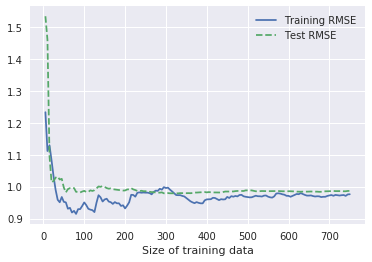

In [341]:
plt.plot(res[:,0], res[:,1])
plt.plot(res[:,0], res[:,2],linestyle = '--')
plt.legend(['Training RMSE', 'Test RMSE'])
plt.xlabel('Size of training data')